In [1]:
# Import needed packages
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
import rioxarray as rxr
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import matplotlib.patches as mpatches


from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
# Neighborhood 
nta = gpd.read_file('../data/2010 Neighborhood Tabulation Areas (NTAs)/geo_export_65077844-70de-4bb7-91ce-729f59546bad.shp')
nta.crs

nta.to_crs(epsg=6347, inplace=True)
print(nta.crs)

# Borough
boro = gpd.read_file("../data/Borough Boundaries/geo_export_da053023-9b69-4e71-bbff-eb976f919a31.shp")

boro.to_crs(epsg=6347, inplace=True)
print(boro.crs)


EPSG:6347
EPSG:6347


epsg:6347


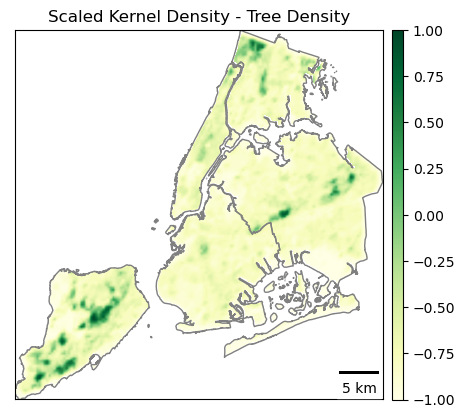

In [3]:
# Define color ramp for housing kernel density
color_ramp = 'YlGn'

# KDE Shapefile
kde = gpd.read_file('../data/L1/tree_kde_contours.shp').to_crs(6347)
print(kde.crs) # already in correct crs

# subset layers
cont50 = kde[kde['contlabel'] == '50']
cont25 = kde[kde['contlabel'] == '25']
cont75 = kde[kde['contlabel'] == '75']

# Raster
file_name = '../data/L1/tree_kde_dens_1ha_scaled.tiff'

r = rxr.open_rasterio(file_name, masked=True)
data_plotting_extent = plotting_extent(r[0], r.rio.transform())


# Create a mask to see which neighborhoods fall within certain kde contours
nta_25 = gpd.sjoin(nta, cont25, predicate = 'intersects')
nta_50 = gpd.sjoin(nta, cont50, predicate = 'intersects')
nta_75 = gpd.sjoin(nta, cont75, predicate = 'intersects')

# Plot uncropped array
f, ax = plt.subplots()


boro.boundary.plot(ax=ax, color = "grey", lw = 1)

ep.plot_bands(r.values,
              cmap = color_ramp,
            ax=ax,
            title="Scaled Kernel Density - Tree Density",
            extent=data_plotting_extent)  # Use plotting extent from DatasetReader object



# Scale bar
ax.add_artist(ScaleBar(dx=1, location = 'lower right'))



plt.savefig('../figs/tree_raster_0.png', dpi = 300, bbox_inches='tight')
plt.show()

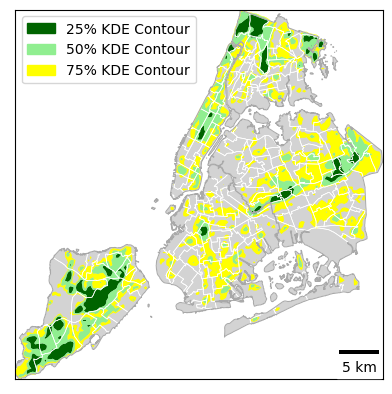

In [4]:
# Plot Neighborhoods with Kernel Density Contours
f, ax = plt.subplots()


# Set extent to match raster extent
plt.xlim(data_plotting_extent[0], data_plotting_extent[1])
plt.ylim(data_plotting_extent[2], data_plotting_extent[3])

nta.plot(ax=ax, color = "lightgrey")
nta.boundary.plot(ax=ax, color = "white", lw = 0.5)

boro.boundary.plot(ax=ax, color = "darkgray", lw = 0.75)

#nta_25.plot(ax=ax, color = "purple")
#nta_50.plot(ax=ax, color = "lightblue")
#nta_75.plot(ax=ax, color = "teal")


cont25.plot(ax=ax, color = "darkgreen", lw = 1)
cont50.plot(ax=ax, color = "lightgreen", lw = 1)
cont75.plot(ax=ax, color = "yellow", lw = 1)

# Scale bar
ax.add_artist(ScaleBar(dx=1, location = 'lower right'))
# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])



# Add Legend
purple_patch = mpatches.Patch(color='darkgreen', label='25% KDE Contour')
lb_patch = mpatches.Patch(color='lightgreen', label='50% KDE Contour')
teal_patch = mpatches.Patch(color='yellow', label='75% KDE Contour')

plt.legend(handles=[purple_patch, lb_patch, teal_patch], loc = 'upper left')


plt.savefig('../figs/tree_housing_kdecont_0.png', dpi = 300, bbox_inches='tight')
plt.show()

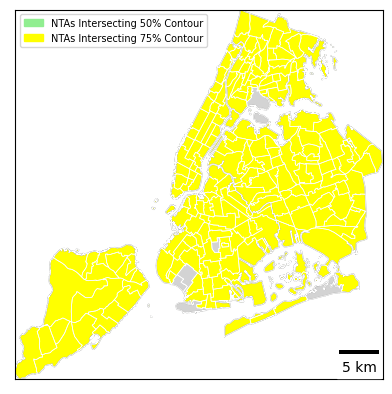

In [5]:
# Plot Neighborhoods with That Contain Kernel Density Contours
f, ax = plt.subplots()

# Set extent to match raster extent
plt.xlim(data_plotting_extent[0], data_plotting_extent[1])
plt.ylim(data_plotting_extent[2], data_plotting_extent[3])

# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])


# Add boro and NTA boundary plots
boro.boundary.plot(ax=ax, color = "darkgray", lw = 0.75)
nta.plot(ax=ax, color = "lightgrey")
nta.boundary.plot(ax=ax, color = "white", lw = 0.5)

# Add the NTAS associated with the corresponding kernel contour
nta_25.plot(ax=ax, color = "darkgreen")
nta_50.plot(ax=ax, color = "lightgreen")
nta_75.plot(ax=ax, color = "yellow")

# Scale bar
ax.add_artist(ScaleBar(dx=1, location = 'lower right'))

# Add Legend
purple_patch = mpatches.Patch(color='darkgreen', label='NTAs Intersecting 25% Contour')
lb_patch = mpatches.Patch(color='lightgreen', label='NTAs Intersecting 50% Contour')
teal_patch = mpatches.Patch(color='yellow', label='NTAs Intersecting 75% Contour')

#plt.legend(handles=[purple_patch], loc = 'upper left', fontsize = "7")
plt.legend(handles=[lb_patch], loc = 'upper left', fontsize = "7")
plt.legend(handles=[lb_patch, teal_patch], loc = 'upper left', fontsize = "7")


plt.savefig('../figs/trees_kdecont_contain_nta_2.png', dpi = 300, bbox_inches='tight')
plt.show()




## HEAT ANOMALY RASTER

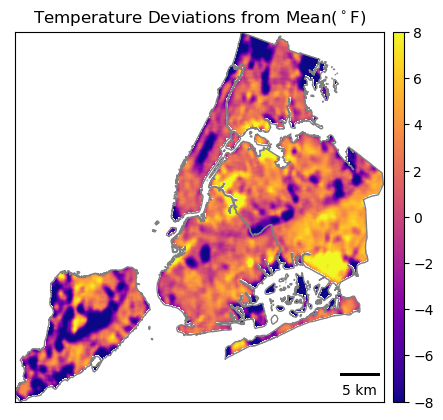

In [6]:
# Define color ramp for housing kernel density
color_ramp = 'plasma'

# KDE Shapefile
#kde = gpd.read_file('../data/L1/tree_kde_contours.shp').to_crs(6347)
#print(kde.crs) # already in correct crs

# subset layers
#cont50 = kde[kde['contlabel'] == '50']
#cont25 = kde[kde['contlabel'] == '25']
#cont75 = kde[kde['contlabel'] == '75']

# Raster
file_name = '../data/heat/f_deviation_smooth_UTM18N_1ha.tiff'

r = rxr.open_rasterio(file_name, masked=True)
data_plotting_extent = plotting_extent(r[0], r.rio.transform())


# Create a mask to see which neighborhoods fall within certain kde contours
#nta_25 = gpd.sjoin(nta, cont25, predicate = 'intersects')
#nta_50 = gpd.sjoin(nta, cont50, predicate = 'intersects')
#nta_75 = gpd.sjoin(nta, cont75, predicate = 'intersects')

# Plot uncropped array
f, ax = plt.subplots()


boro.boundary.plot(ax=ax, color = "grey", lw = 1)

ep.plot_bands(r.values,
              cmap = color_ramp,
            ax=ax,
            title="Temperature Deviations from Mean($^\circ$F)",
            extent=data_plotting_extent)  # Use plotting extent from DatasetReader object



# Scale bar
ax.add_artist(ScaleBar(dx=1, location = 'lower right'))



plt.savefig('../figs/heat_raster_0.png', dpi=300, bbox_inches = 'tight')
plt.show()

In [7]:
# Heat by NTA

gdf = gpd.read_file("../data/L1/NYC_NTA_extracted.shp").set_crs(6347)

In [8]:
gdf.columns

Index(['boro_code', 'boro_name', 'county_fip', 'ntacode', 'ntaname',
       'shape_area', 'shape_leng', 'chm_min', 'chm_max', 'chm_mean',
       'chm_median', 'chm_25_per', 'chm_75_per', 'td_min', 'td_max', 'td_mean',
       'td_median', 'td_25_perc', 'td_75_perc', 'cc_min', 'cc_max', 'cc_mean',
       'cc_median', 'cc_25_perc', 'cc_75_perc', 'cd_min', 'cd_max', 'cd_mean',
       'cd_median', 'cd_25_perc', 'cd_75_perc', 'ha_min', 'ha_max', 'ha_mean',
       'ha_median', 'ha_25_perc', 'ha_75_perc', 'rstab_min', 'rstab_max',
       'rstab_mean', 'rstab_medi', 'rstab_25_p', 'rstab_75_p', 'sub_min',
       'sub_max', 'sub_mean', 'sub_median', 'sub_25_per', 'sub_75_per',
       'aff_min', 'aff_max', 'aff_mean', 'aff_median', 'aff_25_per',
       'aff_75_per', 'geometry'],
      dtype='object')

In [9]:
gdf.crs

<Projected CRS: EPSG:6347>
Name: NAD83(2011) / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United States (USA) - between 78°W and 72°W onshore and offshore - Connecticut; Delaware; Maryland; Massachusetts; New Hampshire; New Jersey; New York; North Carolina; Pennsylvania; Virginia; Vermont.
- bounds: (-78.0, 28.28, -72.0, 45.03)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

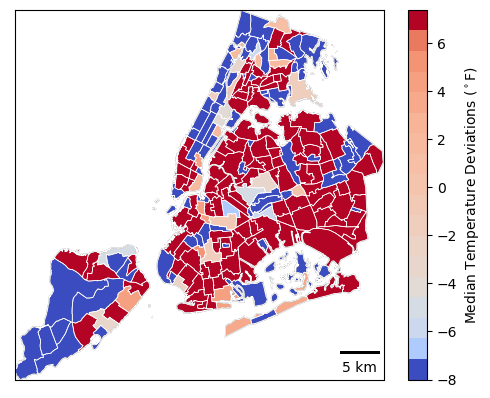

In [11]:
# heat columns are 'ha'
from matplotlib.colors import ListedColormap
import numpy as np

def color_quantile(cmap_name, values, n):
    cmap = plt.get_cmap(cmap_name)
    bounds = np.linspace(0, 1, n + 1)
    norm = plt.Normalize(vmin=values.min(), vmax=values.max())
    quantiles = np.quantile(values, bounds)
    colors = cmap(norm(quantiles))
    return ListedColormap(colors)

# Create a colormap
qpal = color_quantile('coolwarm', gdf['ha_median'], n = 17)


# Plot Neighborhoods with That Contain Kernel Density Contours
f, ax = plt.subplots()

# Set extent to match raster extent
plt.xlim(data_plotting_extent[0], data_plotting_extent[1])
plt.ylim(data_plotting_extent[2], data_plotting_extent[3])

# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])




# Add boro and NTA boundary plots
boro.boundary.plot(ax=ax, color = "darkgray", lw = 0.75)
nta.plot(ax=ax, color = "lightgrey")
nta.boundary.plot(ax=ax, color = "white", lw = 0.5)


# Create a polygon layer with colors based on the values
gdf.plot(ax=ax, facecolor = qpal(gdf['ha_median']))

# Scale bar
ax.add_artist(ScaleBar(dx=1, location = 'lower right'))

# Add a colorbar legend
sm = plt.cm.ScalarMappable(cmap=qpal, norm=plt.Normalize(vmin=gdf['ha_median'].min(), vmax=gdf['ha_median'].max()))
sm._A = []  # Hack to get the colorbar to work
cbar = plt.colorbar(sm)
cbar.set_label('Median Temperature Deviations ($^\circ$F)')  # Set the label for the colorbar


plt.savefig('../figs/heat_map.png', dpi = 300, bbox_inches='tight')
plt.show()

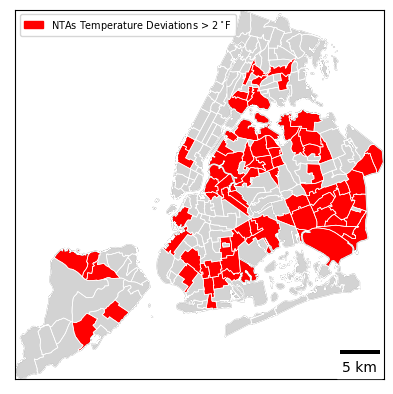

In [12]:
# Plot Neighborhoods with That Contain > 3 degrees heat anomolies on average

gdf_subset = gdf[gdf['ha_median'] > 2]

f, ax = plt.subplots()

# Set extent to match raster extent
plt.xlim(data_plotting_extent[0], data_plotting_extent[1])
plt.ylim(data_plotting_extent[2], data_plotting_extent[3])

# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])


# Add boro and NTA boundary plots
boro.boundary.plot(ax=ax, color = "darkgray", lw = 0.75)
nta.plot(ax=ax, color = "lightgrey")
nta.boundary.plot(ax=ax, color = "white", lw = 0.5)

# Add the NTAS associated with the corresponding heat anomaly
gdf_subset.plot(ax=ax, color = "red")


# Scale bar
ax.add_artist(ScaleBar(dx=1, location = 'lower right'))

# Add Legend
patch = mpatches.Patch(color='red', label='NTAs Temperature Deviations > 2$^\circ$F')


plt.legend(handles=[patch], loc = 'upper left', fontsize = "7")


plt.savefig('../figs/high_heat_anomalies.png', dpi = 300, bbox_inches='tight')
plt.show()



# CANOPY COVERAGE

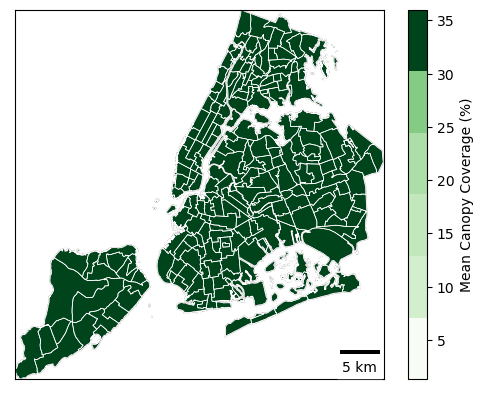

In [14]:
# canopy ara by NTA

# Create a colormap for canopy
qpal = color_quantile('Greens', gdf['cc_mean'], n = 5)


# Plot Neighborhoods with That Contain Kernel Density Contours
f, ax = plt.subplots()

# Set extent to match raster extent
plt.xlim(data_plotting_extent[0], data_plotting_extent[1])
plt.ylim(data_plotting_extent[2], data_plotting_extent[3])

# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])




# Add boro and NTA boundary plots
boro.boundary.plot(ax=ax, color = "darkgray", lw = 0.75)
nta.plot(ax=ax, color = "lightgrey")
nta.boundary.plot(ax=ax, color = "white", lw = 0.5)


# Create a polygon layer with colors based on the values
gdf.plot(ax=ax, facecolor = qpal(gdf['cc_mean']))

# Scale bar
ax.add_artist(ScaleBar(dx=1, location = 'lower right'))

# Add a colorbar legend
sm = plt.cm.ScalarMappable(cmap=qpal, norm=plt.Normalize(vmin=gdf['cc_mean'].min(), vmax=gdf['cc_mean'].max()))
sm._A = []  # Hack to get the colorbar to work
cbar = plt.colorbar(sm)
cbar.set_label('Mean Canopy Coverage (%)')  # Set the label for the colorbar


plt.savefig('../figs/tree_dens_by_NTA.png', dpi = 300, bbox_inches='tight')
plt.show()

In [15]:
gdf['cc_mean']

0      12.553617
1       9.868797
2       9.364042
3      14.594275
4      11.565176
         ...    
190     9.510750
191     8.841697
192     5.124208
193    20.190774
194    22.728539
Name: cc_mean, Length: 195, dtype: float64